<a href="https://colab.research.google.com/github/navyavemavarapu/EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/archive (1).zip")

In [4]:
df.shape

(8807, 12)

In [5]:
df1 = df.copy()

In [6]:
df1.shape

(8807, 12)

In [7]:
df1.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df1.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **Datatypes**

In [10]:
df1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

All datatypes, makes sense except date_added, so changing dtpe of date_added to make it a structured data

In [11]:
df1['date_added'] = df1.date_added.astype("datetime64")

In [13]:
df1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [12]:
df1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Duplicates**

In [14]:
df1.duplicated().sum()

0

No duplicates in the dataset

# **Missing values**

In [15]:
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

replacing null values of rating, cast, country and director as 'unavailable'


In [16]:
df1.fillna({'director':'unavailable','cast':'unavailable','country':'unavailable','rating':'unavailable'},inplace=True)

Here null values in Date_added are being replaced with recent date_added, because netflix adds more content over time.
The other options can be finding the actual date and imputing them manually or dropping the data from results since the amount of missing data is very small.

In [17]:
recent_date = df1['date_added'].max()
df1.fillna({'date_added':recent_date},inplace=True)

**Durations data error**                                                                 The missing durations are all by Louis c.k, usually we can fill the missing duration with mean values, but here there is an error that the actual duration was put into rating column. So we have to replace that duration with rating and reolace those rating data as 'unavailavle'.

In [18]:
df1[df1.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


checking all the data with Louis, just for safety

In [19]:
df1[df1['director'] =='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


we have only 3 data points with director name as Louis C.K.

In [20]:
df1.loc[df1['director'] == 'Louis C.K.','duration'] = df1['rating']
df1[df1['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
df1.loc[df1['director'] == 'Louis C.K.','rating'] ='unavailabe'
df1[df1['director']=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,unavailabe,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,unavailabe,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,unavailabe,66 min,Movies,The comic puts his trademark hilarious/thought...


In [22]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **VISUALIZATIONS**

In [23]:
df1.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Count vs type of shows')

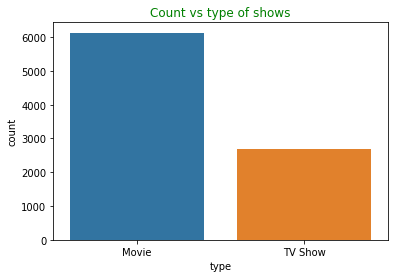

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='type',data=df1)
plt.title("Count vs type of shows",color='g')

On netflix there are more number of movies than TV shows

**Country analysis**

In [25]:
df.country.value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

Text(0.5, 1.0, 'Country wise content on Netflix')

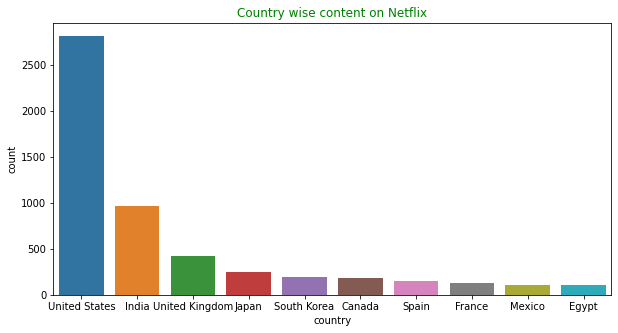

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='country',order=df['country'].value_counts().index[0:10],data=df1)
plt.title("Country wise content on Netflix",color='g')

In [29]:
tvshow_countries = df1[df1['type']=='TV Show']
movie_countries = df1[df1['type']=='Movie']

Text(0.5, 1.0, 'Top 10 countries producing TV shows in Netflix')

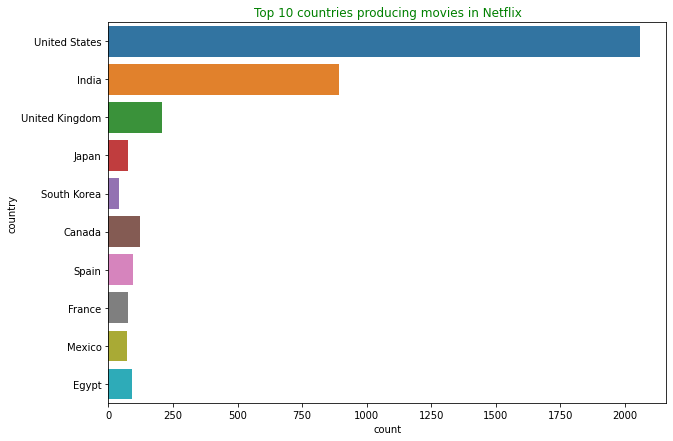

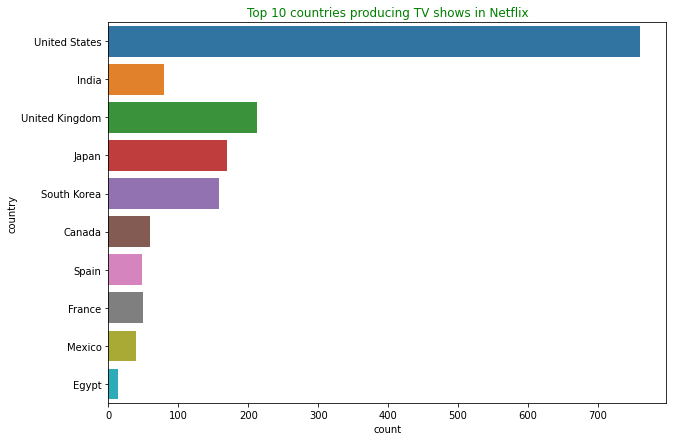

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=movie_countries)
plt.title("Top 10 countries producing movies in Netflix",color='g')


plt.figure(figsize=(10,7))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=tvshow_countries)
plt.title("Top 10 countries producing TV shows in Netflix",color='g')

US produced more movies as well as TV shows

**Ratings**

In [32]:
#MAJOR RATINGS
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Text(0.5, 1.0, 'count of ratings of shows on netflix ')

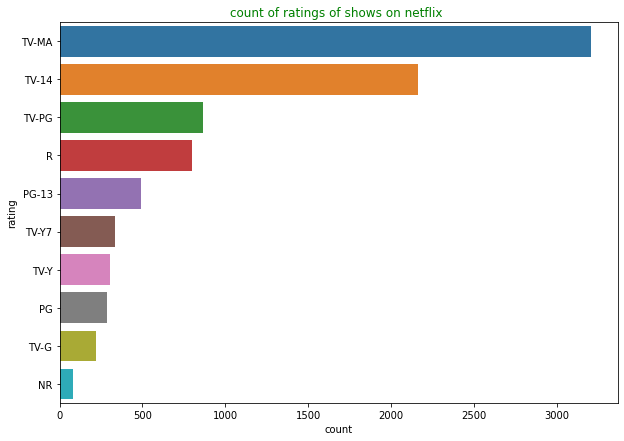

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(y='rating',order=df1['rating'].value_counts().index[0:10],data=df1)
plt.title("count of ratings of shows on netflix ",color='g')

Most of the shows has TV-MA(Matured audiences) and TV-14 ratings

**YEAR**

In [34]:
df1.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

Text(0.5, 1.0, 'Count of movies releasing in particular year')

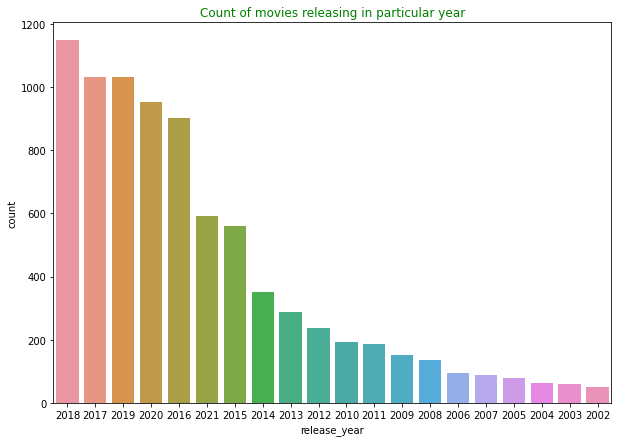

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(x='release_year',order=df1['release_year'].value_counts().index[0:20],data=df1)
plt.title("Count of movies releasing in particular year",color='g')

More number of movies are released in 2018

**Popular genres**

Text(0.5, 1.0, 'Top 20 genres on Netflix')

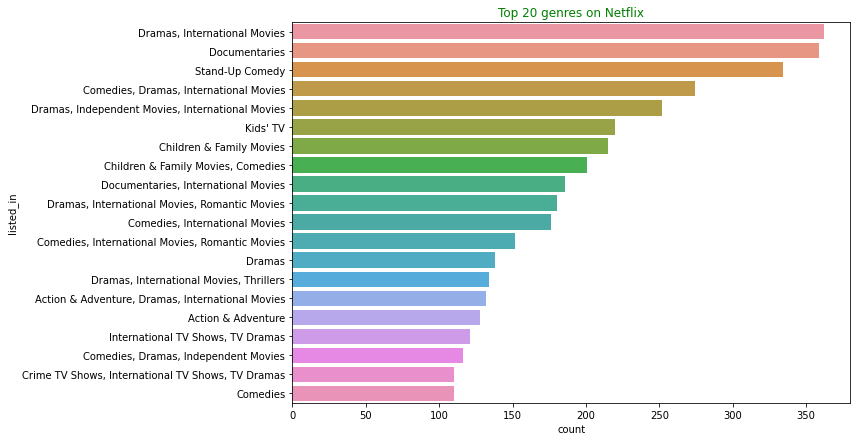

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(y='listed_in',order=df1['listed_in'].value_counts().index[0:20],data=df1)
plt.title("Top 20 genres on Netflix",color='g')

dramas,international movies are the most popular genres on Netflix